In [1]:
# https://towardsdatascience.com/supervised-learning-with-python-cf2c1ae543c1

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
iris_df = datasets.load_iris()

print(dir(iris_df))

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


In [4]:
print(iris_df.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print(iris_df.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
print(iris_df.target_names)

label = {0: 'red', 1: 'blue', 2: 'green'}

['setosa' 'versicolor' 'virginica']


In [7]:
x_axis = iris_df.data[:, 0]
y_axis = iris_df.data[:, 2]

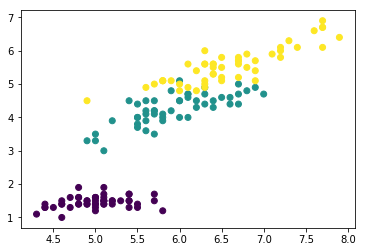

In [8]:
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

Using Raster

In [13]:
import rasterio
import rasterio.features
import rasterio.warp
from rasterio.plot import show
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import numpy as np

In [12]:
dataset = rasterio.open(r'D:\GitHub\test\LC5_2017_Outside_Clip.tif')

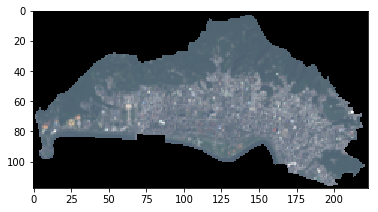

In [16]:
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

R = dataset.read(4)
G = dataset.read(3)
B = dataset.read(2)
NIR = dataset.read(5)

Rn = normalize(R)
Gn = normalize(G)
Bn = normalize(B)
NIRn = normalize(NIR)

RGB = np.dstack((Rn, Gn, Bn))
plt.imshow(RGB)

In [22]:
Rn = Rn.flatten()
Gn = Gn.flatten()
Bn = Bn.flatten()
NIRn = NIRn.flatten()

Image = list(zip(Rn, Gn, Bn, NIRn))

# KMeans

In [28]:
from sklearn import datasets
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

In [45]:
model = KMeans(n_clusters=5)

model.fit(Image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [46]:
labels = model.labels_

In [47]:
labels = labels.reshape((118, 223))

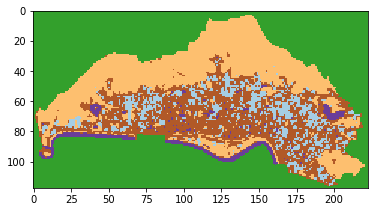

In [48]:
plt.imshow(labels, cmap='Paired')

# t-SNE Clustering(???)

In [60]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [81]:
dbscan = DBSCAN(n_jobs=5)
dbscan.fit(Image)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=5, p=None)

In [79]:
labels = dbscan.labels_
labels = labels.reshape((118, 223))

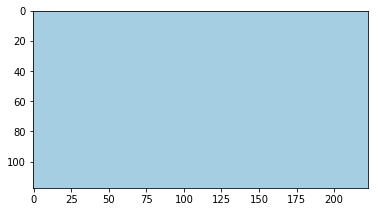

In [80]:
plt.imshow(labels, cmap='Paired')

In [95]:
#https://medium.com/datadriveninvestor/unsupervised-learning-with-python-k-means-and-hierarchical-clustering-f36ceeec919c